--- Using TensorFlow Version: 2.20.0 ---

--- Section 1: Initializing Setup ---

--- Section 2: Splitting Data ---
Data splitting complete.

--- Section 3: Creating Data Pipelines ---
Found 1509 files belonging to 5 classes.
Found 324 files belonging to 5 classes.
Found 326 files belonging to 5 classes.
Data pipelines created.

--- Section 5: Building ResNet50V2 Model ---

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │        10,245 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,575,045 (89.93 MB)

 Trainable params: 10,245 (40.02 KB)

 Non-trainable params: 23,564,800 (89.89 MB)


--- Section 6: Starting Model Training ---
Epoch 1/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.2293 - loss: 2.2537 - val_accuracy: 0.3148 - val_loss: 1.5906
Epoch 2/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.2598 - loss: 2.0500 - val_accuracy: 0.3642 - val_loss: 1.4836
Epoch 3/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.2863 - loss: 1.8571 - val_accuracy: 0.4136 - val_loss: 1.4101
Epoch 4/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.3400 - loss: 1.7184 - val_accuracy: 0.4537 - val_loss: 1.3489
Epoch 5/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.3194 - loss: 1.7059 - val_accuracy: 0.4938 - val_loss: 1.2994
Epoch 6/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.3877 - loss: 1.5683 - val_accuracy: 0.5093 - val_loss: 1.2561
Epoch 7/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.3930 - loss: 1.5010 - val_accuracy: 0.5309 - val_loss: 1.2218
Epoch 8/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.4248 - los

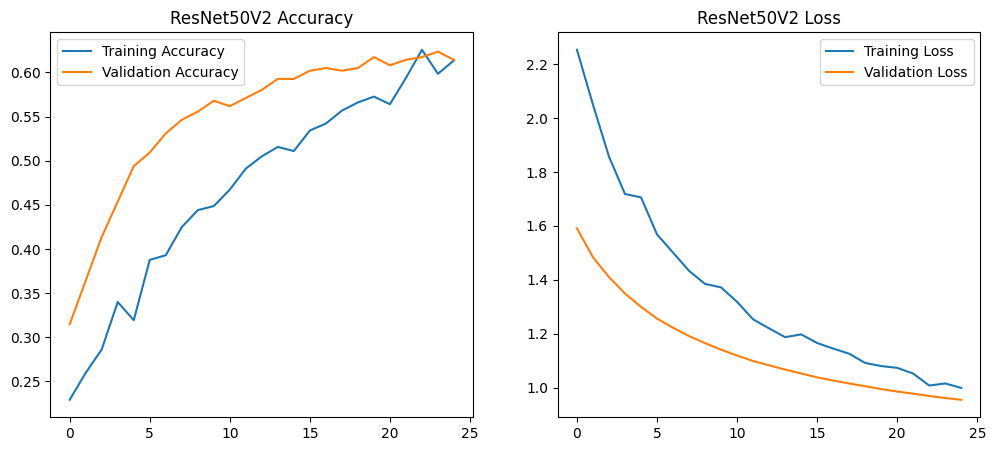

11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step

--- Classification Report ---
                precision    recall  f1-score   support

  Anthracnose       0.80      0.65      0.71        54
BacterialSpot       0.50      0.51      0.50        69
         Curl       0.64      0.68      0.66        88
      Healthy       0.54      0.37      0.44        35
     RingSpot       0.70      0.82      0.76        80

     accuracy                           0.64       326
    macro avg       0.64      0.61      0.62       326
 weighted avg       0.64      0.64      0.64       326


--- Confusion Matrix ---


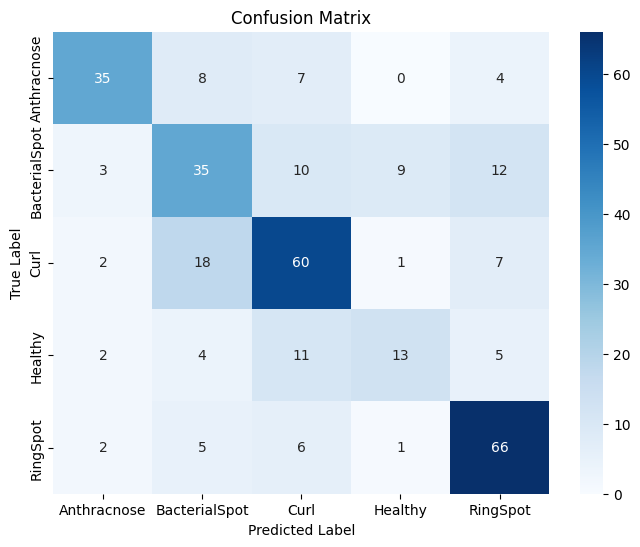


--- Script Finished ---


In [1]:
# ==============================================================================
# STANDALONE SCRIPT FOR PAPAYA LEAF DISEASE CLASSIFICATION (ResNet50V2)
# ==============================================================================
# This script is a self-contained solution to train and evaluate ResNet50V2
# in a stable environment like Google Colab. It handles its own data splitting
# and pipeline creation to ensure a clean run.
# ==============================================================================

import os
import shutil
import random
import pathlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

print(f"--- Using TensorFlow Version: {tf.__version__} ---")

# --- 1. SETUP AND CONSTANTS ---
print("\n--- Section 1: Initializing Setup ---")
SEED = 42
tf.keras.utils.set_random_seed(SEED)
ORIGINAL_DATA_DIR = pathlib.Path('BDPapayaLeaf/Original Images')
SPLIT_BASE_DIR = pathlib.Path('papaya_data_split_resnet')
CLASS_NAMES = sorted([item.name for item in ORIGINAL_DATA_DIR.glob('*') if item.is_dir()])

# Model & Training Constants
IMG_SIZE = (224, 224) # Native resolution for ResNet50V2
BATCH_SIZE = 32
EPOCHS = 25
LEARNING_RATE = 0.0001
NUM_CLASSES = len(CLASS_NAMES)

# --- 2. DATA PREPARATION: STRATIFIED SPLIT ---
print("\n--- Section 2: Splitting Data ---")
if SPLIT_BASE_DIR.exists():
    shutil.rmtree(SPLIT_BASE_DIR)
train_dir = SPLIT_BASE_DIR / 'train'
val_dir = SPLIT_BASE_DIR / 'validation'
test_dir = SPLIT_BASE_DIR / 'test'
for d in [train_dir, val_dir, test_dir]:
    os.makedirs(d)
for class_name in CLASS_NAMES:
    for d in [train_dir, val_dir, test_dir]:
        os.makedirs(d / class_name)
    image_files = list((ORIGINAL_DATA_DIR / class_name).glob('*.jpg'))
    random.Random(SEED).shuffle(image_files)
    train_split, val_split = int(len(image_files) * 0.70), int(len(image_files) * 0.85)
    for i, f in enumerate(image_files):
        if i < train_split:
            shutil.copy(f, train_dir / class_name)
        elif i < val_split:
            shutil.copy(f, val_dir / class_name)
        else:
            shutil.copy(f, test_dir / class_name)
print("Data splitting complete.")

# --- 3. DATA PIPELINES (tf.data) ---
print("\n--- Section 3: Creating Data Pipelines ---")
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE, label_mode='categorical', shuffle=True, seed=SEED
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE, label_mode='categorical', shuffle=False
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE, label_mode='categorical', shuffle=False
)
AUTOTUNE = tf.data.AUTOTUNE
train_ds, val_ds, test_ds = (ds.cache().prefetch(buffer_size=AUTOTUNE) for ds in [train_ds, val_ds, test_ds])
print("Data pipelines created.")

# --- 4. VISUALIZATION HELPER FUNCTIONS ---
def plot_history(history, model_name):
    acc, val_acc, loss, val_loss = history.history['accuracy'], history.history['val_accuracy'], history.history['loss'], history.history['val_loss']
    plt.figure(figsize=(12, 5)); plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy'); plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(); plt.title(f'{model_name} Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss'); plt.plot(val_loss, label='Validation Loss')
    plt.legend(); plt.title(f'{model_name} Loss'); plt.show()

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6)); sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label'); plt.ylabel('True Label'); plt.title('Confusion Matrix'); plt.show()

# --- 5. MODEL BUILDING (ResNet50V2) ---
print("\n--- Section 5: Building ResNet50V2 Model ---")
tf.keras.backend.clear_session()
base_model = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=IMG_SIZE + (3,))
base_model.trainable = False
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=IMG_SIZE + (3,)),
    tf.keras.layers.Rescaling(1./255.), # ResNetV2 benefits from 0-1 scaling
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# --- 6. MODEL TRAINING ---
print("\n--- Section 6: Starting Model Training ---")
history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

# --- 7. MODEL EVALUATION ---
print("\n--- Section 7: Evaluating Model Performance ---")
plot_history(history, "ResNet50V2")
y_pred_probs = model.predict(test_ds)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(np.concatenate([y for x, y in test_ds]), axis=1)
print("\n--- Classification Report ---\n", classification_report(y_true_labels, y_pred_labels, target_names=CLASS_NAMES))
print("\n--- Confusion Matrix ---"); plot_confusion_matrix(y_true_labels, y_pred_labels, CLASS_NAMES)
print("\n--- Script Finished ---")

In [2]:
model.save("ResNetv2.keras")